In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mymodels
import tensorflow as tf
from tensorflow.keras.backend import clear_session

In [2]:
#main_folder = '../'   #main use
main_folder = './'     #for debugging
dataset_folder = main_folder + 'dataset2_debug/'
checkpoints_folder = main_folder + 'checkpoints_sect2/'
logs_folder = main_folder + 'logs/'

In [3]:
dataset = tf.data.TFRecordDataset(main_folder + 'train.tfrecord')
coords_dataset = tf.data.TFRecordDataset(main_folder + 'coords.tfrecord')


In [4]:
def _parse_image_function(example_proto, label_shape=[128,1]):
    # Define the features to be extracted (serialized image and label)
    image_feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string),  # Expecting the image as a serialized tensor (string)
        'label': tf.io.FixedLenFeature([], tf.string),  # Expecting the label as a serialized tensor (string)
    }

    # Parse the input tf.train.Example proto using the dictionary
    parsed_features = tf.io.parse_single_example(example_proto, image_feature_description)
    
    # Deserialize the image and label tensors
    image = tf.io.parse_tensor(parsed_features['image'], out_type=tf.float32)  # Deserialize image tensor
    label = tf.io.parse_tensor(parsed_features['label'], out_type=tf.int32)  # Deserialize label tensor

    # Ensure that the image tensor has the correct shape
    image.set_shape([128, 128, 128, 1])  # Set the known shape for the image tensor

    # Ensure that the label tensor has the correct shape
    label.set_shape(label_shape)

    return image, label

In [5]:
parsed_dataset = dataset.map(_parse_image_function)
parsed_coords = coords_dataset.map(lambda example_proto: _parse_image_function(example_proto, label_shape=[128, 2]))


In [6]:
#parsed_dataset = parsed_dataset

(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (128, 2)
(128, 128, 128, 1) (

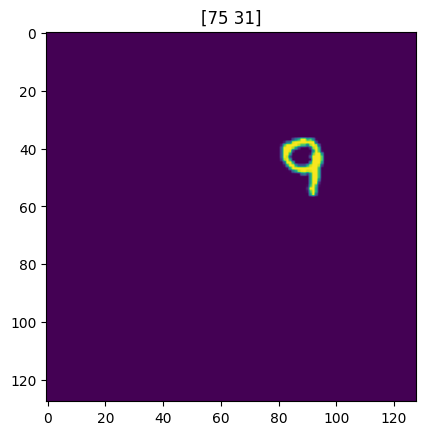

In [7]:
for a in parsed_coords:
    image, coords = a
    print(image.shape, coords.shape)
    plt.imshow(image[0])
    plt.title(f'{coords[0]}')


In [8]:
model = mymodels.debug()
model.compile()
model.model.fit(parsed_coords, epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2097280   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2,097,538
Trainable params: 2,097,538
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
200/200 [==============================] - 4s 13ms/step - loss: 467.0503 - mean_absolute_error: 15.2981
Epoch 2/10
200/200 [==============================] - 2s 9ms/step - loss: 204.9549 - mean_absolute_error: 10.3472
Epoch 3/10
200/200 [==============================] - 2s 10ms/step - loss: 1